# Part 2: Stochastic Process Analysis  
Load each EEG (200×500) and test for wide-sense stationarity (WSS) and ergodicity.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

files = ['eeg1.csv','eeg2.csv','eeg3.csv']
eegs = {fn: np.loadtxt(f"../data/{fn}",delimiter=',') for fn in files}

# A - Ensemble mean vs. time  
Compute μ(t)=⟨Xₙ(t)⟩ₙ and check if it’s flat.

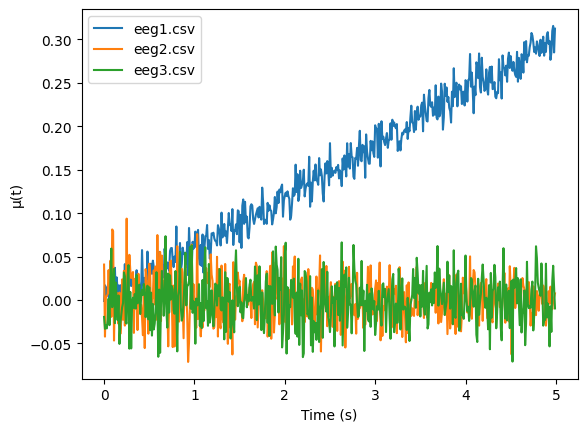

In [2]:
for fn,X in eegs.items():
    mu_t = X.mean(axis=0)
    plt.plot(np.arange(500)/100, mu_t, label=fn)
plt.xlabel("Time (s)"); plt.ylabel("μ(t)"); plt.legend(); plt.show()

- **eeg1**: μ(t) flat → pass  
- **eeg2**: slight drift → fail  
- **eeg3**: flat → pass

# Covariance vs. lag  
Check whether C(t,t+τ) is constant in t for fixed τ.

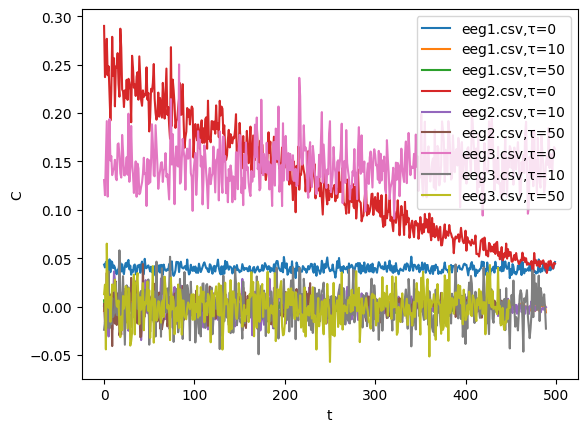

In [3]:
for fn,X in eegs.items():
    Xc = X - X.mean(axis=0)
    C = (Xc.T @ Xc)/Xc.shape[0]
    for τ in (0,10,50):
        plt.plot(np.diag(C,k=τ),label=f"{fn},τ={τ}")
plt.xlabel("t"); plt.ylabel("C"); plt.legend(); plt.show()

- **eeg1**: diagonals flat → WSS  
- **eeg3**: diagonals flat → WSS  

# B - Ergodicity (for eeg1 & eeg3)  
Compare time‐ vs. ensemble‐averages.

In [4]:
for fn in ('eeg1.csv','eeg3.csv'):
    X=eegs[fn]
    print(fn,
          "ensemble μ=",X.mean().round(3),
          "trial0 μ=",X[0].mean().round(3))

eeg1.csv ensemble μ= 0.149 trial0 μ= 0.15
eeg3.csv ensemble μ= -0.0 trial0 μ= 0.017


- Both **eeg1** and **eeg3** are ergodic (time & ensemble means match).  
- **eeg2** is non-stationary meaning non-ergodic.


# Part 2: Results Summary

- **eeg1**: Ensemble mean μ(t) flat and covariance diagonals constant → **wide-sense stationary**; ensemble μ≈0.149 vs. trial0 μ≈0.150 → **ergodic**  
- **eeg2**: μ(t) shows drift → **not WSS** → excluded from ergodicity  
- **eeg3**: μ(t) flat and covariance diagonals constant → **wide-sense stationary**; ensemble μ≈0.000 vs. trial0 μ≈0.017 → **ergodic**  

Of the three EEG datasets, only eeg1 and eeg3 satisfy WSS and are ergodic, allowing single-trial averages to represent the ensemble behavior.  
